In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Preprocessing

In [3]:
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.columns

Index(['ID', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe() ## 5point summary

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Null values detection
data.isnull().sum()

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis

In [9]:
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

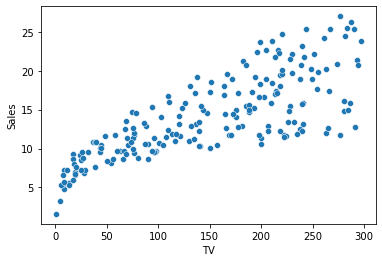

In [10]:
sns.scatterplot(x=data['TV'],y=data['Sales'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

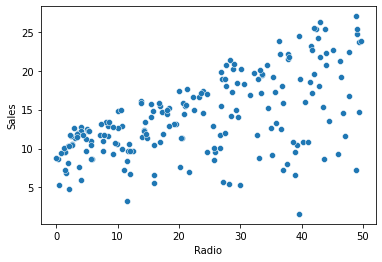

In [11]:
sns.scatterplot(x=data['Radio'],y=data['Sales'])

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

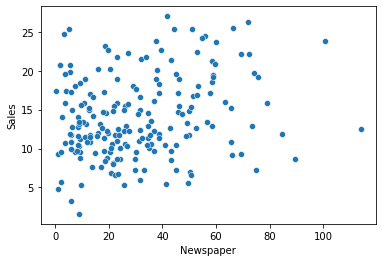

In [12]:
sns.scatterplot(x=data['Newspaper'],y=data['Sales'])

<Figure size 720x1440 with 0 Axes>

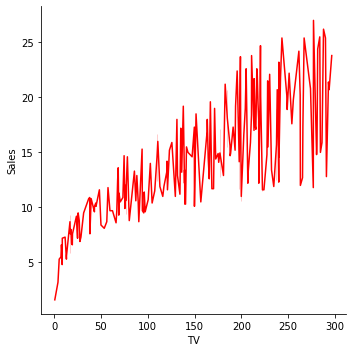

In [15]:
sns.relplot(x=data['TV'],y=data['Sales'],kind='line',color='r')

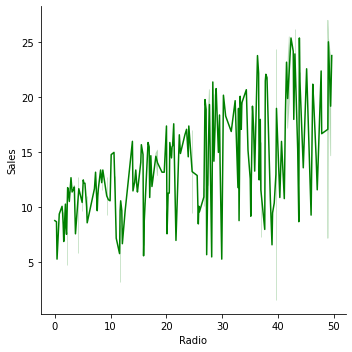

In [16]:
sns.relplot(x=data['Radio'],y=data['Sales'],kind='line',color='g')

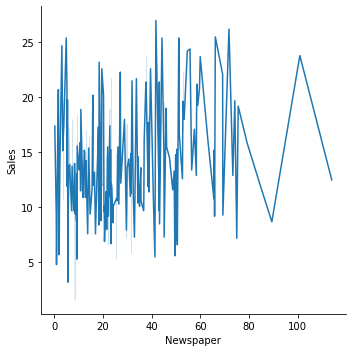

In [17]:
sns.relplot(x=data['Newspaper'],y=data['Sales'],kind='line')

In [18]:
data.drop(labels=['ID'],axis=1,inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


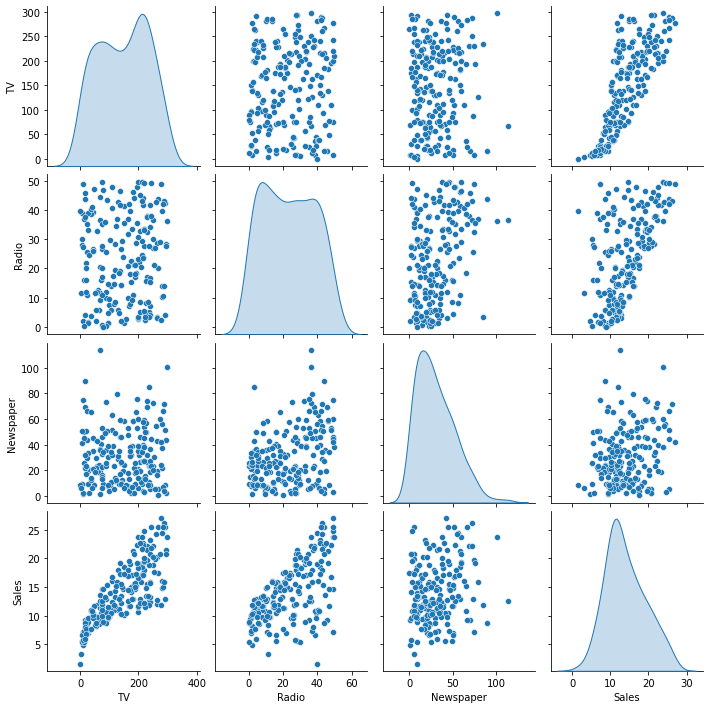

In [21]:
sns.pairplot(data,kind='scatter',diag_kind='kde')

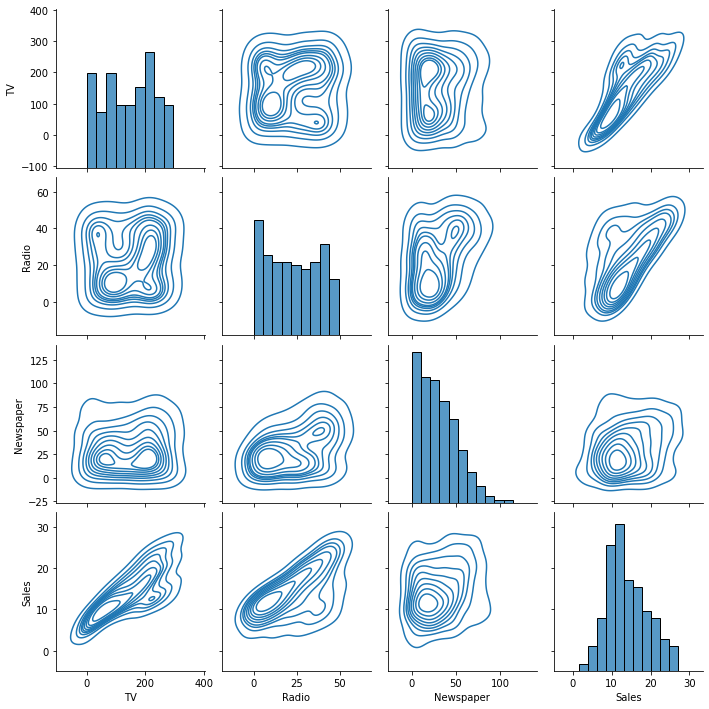

In [22]:
sns.pairplot(data,kind='kde',diag_kind='hist')

In [23]:
sales = data['Sales']
data.drop(labels=['Sales'],axis=1,inplace=True)

In [24]:
data.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


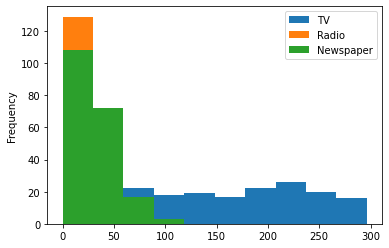

In [25]:
data.plot(kind='hist')
plt.show()

###### Handling outliers

<AxesSubplot:>

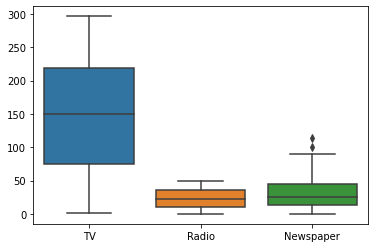

In [26]:
sns.boxplot(data=data)

D:\anaconda_python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

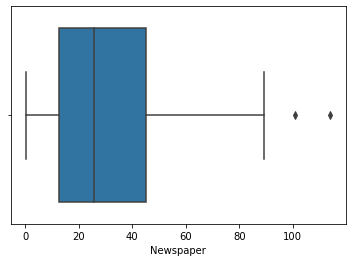

In [27]:
sns.boxplot(data['Newspaper'])

In [28]:
q1 = data['Newspaper'].quantile(0.25)
q3 = data['Newspaper'].quantile(0.75)
IQR = q3-q1
lower = q1-1.5*IQR
upper = q3+1.5*IQR

In [29]:
m = data['Newspaper'].mean()
m

30.553999999999995

In [30]:
for index,i in enumerate(data['Newspaper']):
    if i<lower or i>upper:
        print(index)
        print(i)

16
114.0
101
100.9


In [31]:
data['Newspaper'].iloc[16] = m
data['Newspaper'].iloc[16]

30.553999999999995

In [32]:
data['Newspaper'].iloc[101] = m
data['Newspaper'].iloc[101]

30.553999999999995

D:\anaconda_python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

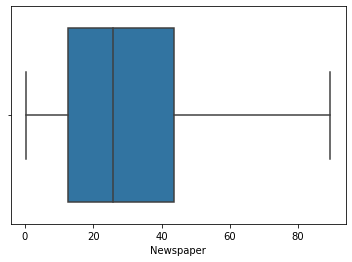

In [33]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:>

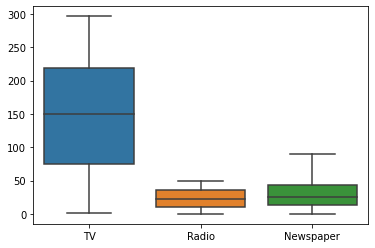

In [34]:
sns.boxplot(data=data)

###### Correlation

In [35]:
temp_df = data.copy()
temp_df['Sales'] = sales

In [40]:
corr = temp_df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049440,0.782224
Radio,0.054809,1.000000,0.345313,0.576223
Newspaper,0.049440,0.345313,1.000000,0.217856
Sales,0.782224,0.576223,0.217856,1.000000


<AxesSubplot:>

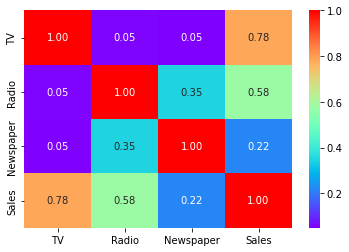

In [37]:
sns.heatmap(corr,fmt='.2f',annot=True,cmap='rainbow')

###### Covariance

In [38]:
cov = temp_df.cov()
cov

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,86.350442,350.390195
Radio,69.862492,220.427743,104.296646,44.635688
Newspaper,86.350442,104.296646,413.855790,23.123495
Sales,350.390195,44.635688,23.123495,27.221853


<AxesSubplot:>

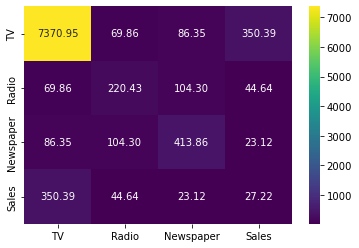

In [39]:
sns.heatmap(cov,fmt='.2f',annot=True,cmap='viridis')

###### Observations

## Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
data.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [46]:
sales.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(data,sales,test_size=0.20,random_state=42,shuffle=True)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(160, 3)
(40, 3)
(160,)
(40,)


## Model Building

In [48]:
result_df = pd.DataFrame()
result_df['Sales_Test'] = ytest
result_df.head()

,Sales_Test
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


### 1. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(xtrain,ytrain)

LinearRegression()

In [52]:
print('Linear Model Coefficient Slope (m): ', regressor.coef_)
print('Linear Model Coefficient Intercept (b): ', regressor.intercept_)

Linear Model Coefficient Slope (m):  [0.04474854 0.18955948 0.00217718]
Linear Model Coefficient Intercept (b):  2.9863202044508927


In [54]:
y_predict_reg = regressor.predict(xtest)

In [56]:
result_df['Linear_Regression'] = y_predict_reg
result_df.sample(5)

,Sales_Test,Linear_Regression
150,16.1,18.262669
67,13.4,11.990612
66,9.5,9.063852
56,5.5,8.729741
186,10.3,9.684730


##### Regression line for training

In [88]:
x = np.array(xtrain['TV'])

Text(0.5, 1.0, 'Sales generated from TV')

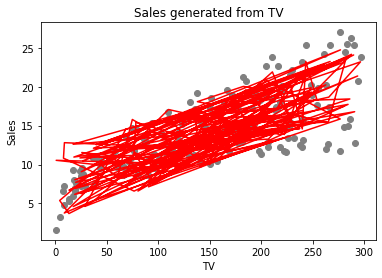

In [89]:
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, regressor.predict(xtrain), color = 'red')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('Sales generated from TV')


Text(0.5, 1.0, 'Sales generated from Radio')

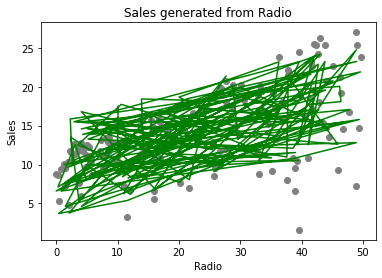

In [95]:
x = np.array(xtrain['Radio'])
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, regressor.predict(xtrain), color = 'green')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.title('Sales generated from Radio')

Text(0.5, 1.0, 'Sales generated from Newspaper')

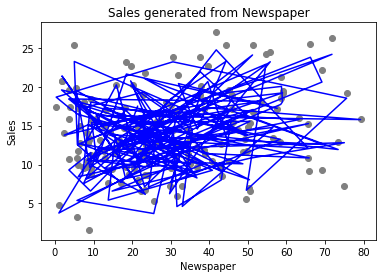

In [93]:
x = np.array(xtrain['Newspaper'])
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, regressor.predict(xtrain), color = 'blue')
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.title('Sales generated from Newspaper')

##### Regression line for testing

Text(0.5, 1.0, 'Sales generated from TV')

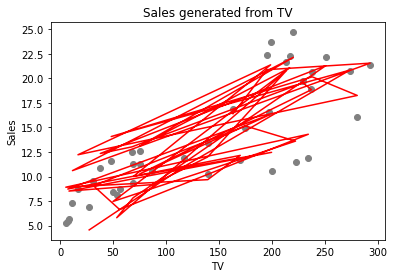

In [96]:
x = np.array(xtest['TV'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, regressor.predict(xtest), color = 'red')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('Sales generated from TV')

Text(0.5, 1.0, 'Sales generated from Radio')

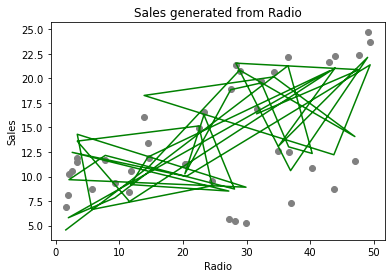

In [97]:
x = np.array(xtest['Radio'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, regressor.predict(xtest), color = 'green')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.title('Sales generated from Radio')

Text(0.5, 1.0, 'Sales generated from Newspaper')

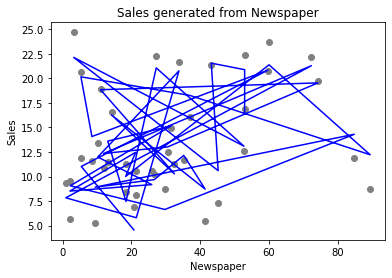

In [98]:
x = np.array(xtest['Newspaper'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, regressor.predict(xtest), color = 'blue')
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.title('Sales generated from Newspaper')

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Training Evaluation

In [101]:
mse = mean_squared_error(ytrain, regressor.predict(xtrain))
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytrain, regressor.predict(xtrain))
r2 = r2_score(ytrain, regressor.predict(xtrain))
adjusted_r2 = 1 - (1-r2)*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)
print("Adjusted R-squared: ", adjusted_r2)

Mean Squared Error (MSE):  2.7062599528725313
Root Mean Squared Error (RMSE):  1.6450714126968868
Mean Absolute Error (MAE):  1.1987019765573135
R-squared (R^2):  0.8956572383103751
Adjusted R-squared:  0.8936506467394209


#### Testing Evaluation

In [102]:
mse = mean_squared_error(ytest, regressor.predict(xtest))
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, regressor.predict(xtest))
r2 = r2_score(ytest, regressor.predict(xtest))
adjusted_r2 = 1 - (1-r2)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)
print("Adjusted R-squared: ", adjusted_r2)

Mean Squared Error (MSE):  3.159076596156929
Root Mean Squared Error (RMSE):  1.7773791368632998
Mean Absolute Error (MAE):  1.4522876389192796
R-squared (R^2):  0.8999139128079505
Adjusted R-squared:  0.8915734055419464


### 2. Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

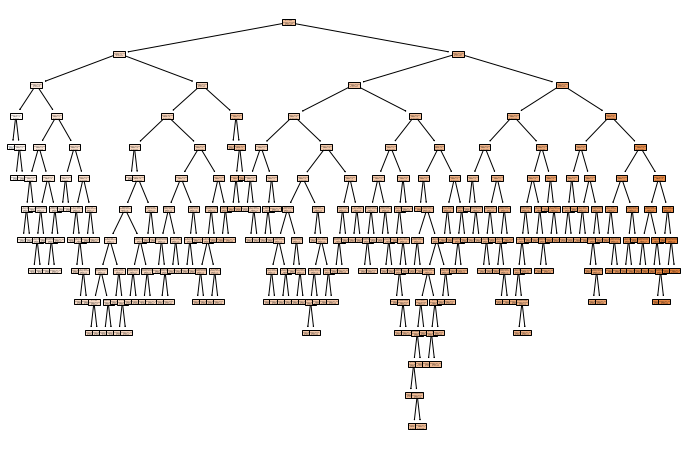

In [115]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(dt, feature_names=xtrain.columns, filled=True, precision=2)
plt.show()

###### Training Line

Text(0.5, 1.0, 'Sales generated from TV')

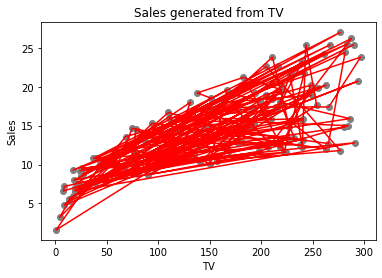

In [116]:
x = np.array(xtrain['TV'])
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, dt.predict(xtrain), color = 'red')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('Sales generated from TV')

Text(0.5, 1.0, 'Sales generated from Radio')

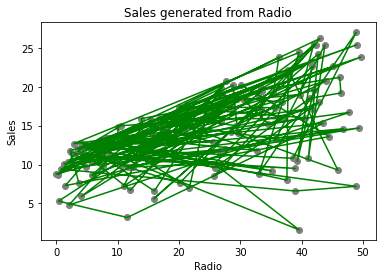

In [117]:
x = np.array(xtrain['Radio'])
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, dt.predict(xtrain), color = 'green')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.title('Sales generated from Radio')

Text(0.5, 1.0, 'Sales generated from Newspaper')

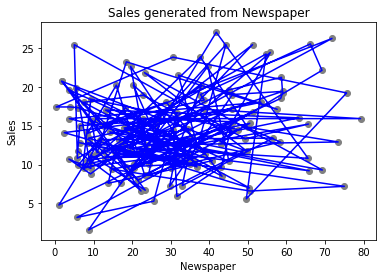

In [118]:
x = np.array(xtrain['Newspaper'])
plt.scatter(x, ytrain, color = 'gray')
plt.plot(x, dt.predict(xtrain), color = 'blue')
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.title('Sales generated from Newspaper')

###### Testing Line

Text(0.5, 1.0, 'Sales generated from TV')

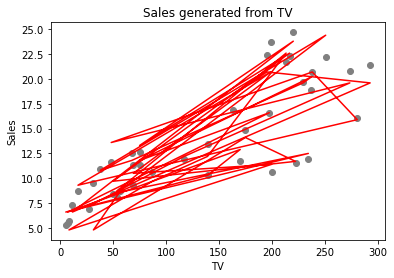

In [119]:
x = np.array(xtest['TV'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, dt.predict(xtest), color = 'red')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('Sales generated from TV')

Text(0.5, 1.0, 'Sales generated from Radio')

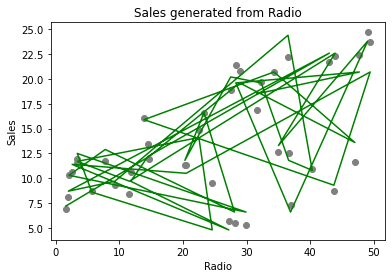

In [121]:
x = np.array(xtest['Radio'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, dt.predict(xtest), color = 'green')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.title('Sales generated from Radio')

Text(0.5, 1.0, 'Sales generated from Newspaper')

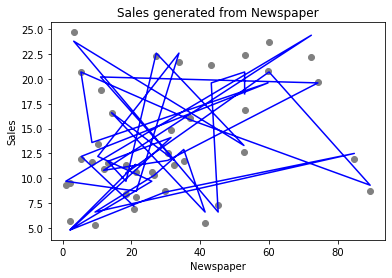

In [122]:
x = np.array(xtest['Newspaper'])
plt.scatter(x, ytest, color = 'gray')
plt.plot(x, dt.predict(xtest), color = 'blue')
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.title('Sales generated from Newspaper')

#### Training Evaluation

In [123]:
mse = mean_squared_error(ytrain, dt.predict(xtrain))
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytrain, dt.predict(xtrain))
r2 = r2_score(ytrain, dt.predict(xtrain))
adjusted_r2 = 1 - (1-r2)*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)
print("Adjusted R-squared: ", adjusted_r2)

Mean Squared Error (MSE):  0.0
Root Mean Squared Error (RMSE):  0.0
Mean Absolute Error (MAE):  0.0
R-squared (R^2):  1.0
Adjusted R-squared:  1.0


#### Testing Evaluation

In [124]:
mse = mean_squared_error(ytest, dt.predict(xtest))
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, dt.predict(xtest))
r2 = r2_score(ytest, dt.predict(xtest))
adjusted_r2 = 1 - (1-r2)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)
print("Adjusted R-squared: ", adjusted_r2)

Mean Squared Error (MSE):  1.693
Root Mean Squared Error (RMSE):  1.3011533345459327
Mean Absolute Error (MAE):  0.95
R-squared (R^2):  0.9463622547733495
Adjusted R-squared:  0.9418924426711286


In [128]:
result_df['Decision_Tree'] = dt.predict(xtest)
result_df.sample(5)

,Sales_Test,Linear_Regression,Decision_Tree
124,19.7,19.540429,19.6
18,11.3,10.008731,10.5
65,9.3,7.838832,9.7
137,20.8,20.842243,19.6
9,10.6,12.466090,11.4


### Saving the model

In [125]:
import pickle

In [126]:
pickle.dump(dt,open('sales_adv.pkl','wb'))